<a href="https://colab.research.google.com/github/MorningStarTM/Machine_Learning_Examples/blob/main/brain_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import packages and libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob

In [2]:
#path
train = "/content/drive/MyDrive/DataSet/brain_cancer/Training"
test = "/content/drive/MyDrive/DataSet/brain_cancer/Testing"

#Visualize the image data

In [3]:
#path of disease
giloma = "/content/drive/MyDrive/DataSet/brain_cancer/Training/glioma/Tr-glTr_0000.jpg"
meningimo = "/content/drive/MyDrive/DataSet/brain_cancer/Training/meningioma/Tr-meTr_0000.jpg"
notumor = "/content/drive/MyDrive/DataSet/brain_cancer/Training/notumor/Tr-noTr_0000.jpg"
pituitary = "/content/drive/MyDrive/DataSet/brain_cancer/Training/pituitary/Tr-piTr_0000.jpg"

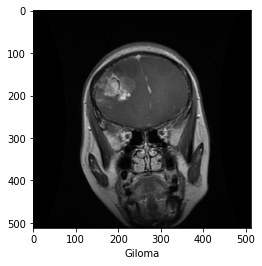

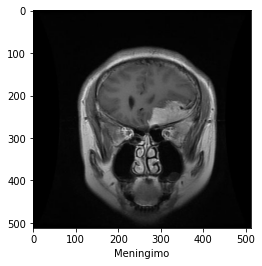

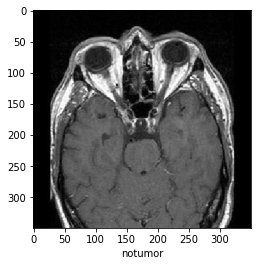

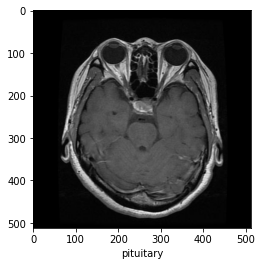

In [4]:
img_giloma = cv2.imread(giloma)
plt.imshow(img_giloma)
plt.xlabel("Giloma")
plt.show()

img_meningimo = cv2.imread(meningimo)
plt.imshow(img_meningimo)
plt.xlabel("Meningimo")
plt.show()

img_notumor = cv2.imread(notumor)
plt.imshow(img_notumor)
plt.xlabel("notumor")
plt.show()

img_pituitary = cv2.imread(pituitary)
plt.imshow(img_pituitary)
plt.xlabel("pituitary")
plt.show()

In [5]:
#size of image
print(img_giloma.shape)
print(img_meningimo.shape)
print(img_notumor.shape)
print(img_pituitary.shape)

(512, 512, 3)
(512, 512, 3)
(350, 350, 3)
(512, 512, 3)


In [6]:
#image resize 
IMAGE_SIZE = [224,224]

#Create ResNet Model

In [ ]:
#resnet, ignore the top layer
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 7s 0us/step


In [ ]:
#avoid the train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
folders = glob("/content/drive/MyDrive/DataSet/brain_cancer/Training/*")

In [ ]:
#adding own layer
X = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(X)

In [ ]:
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Preprocessing Image

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(train, target_size=(224, 224), batch_size=16, class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [30]:
test_set = test_datagen.flow_from_directory(test, target_size=(224, 224), batch_size=16, class_mode='categorical')

Found 780 images belonging to 4 classes.


In [10]:
imgs, labels = next(train_set)

In [24]:
def PlotImg(img_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(img_arr, axes):
    ax.imshow(img)
    ax.axis('off')

  plt.tight_layout()
  plt.show()

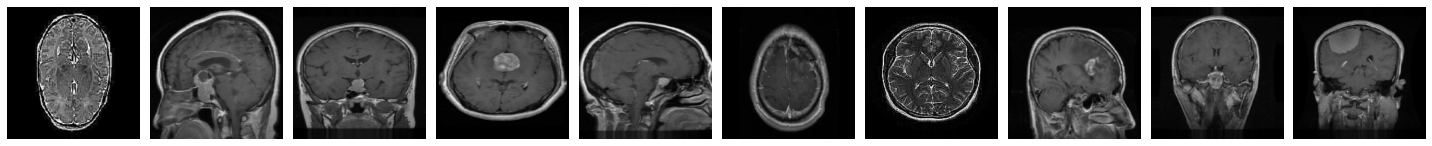

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [25]:
PlotImg(imgs)
print(labels)

#Train

In [ ]:
r = model.fit_generator(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
357/357 [==============================] - 107s 299ms/step - loss: 0.8534 - accuracy: 0.7798 - val_loss: 5.5847 - val_accuracy: 0.4737
Epoch 2/30
357/357 [==============================] - 102s 287ms/step - loss: 0.8896 - accuracy: 0.7887 - val_loss: 1.5620 - val_accuracy: 0.6697
Epoch 3/30
357/357 [==============================] - 101s 282ms/step - loss: 1.0152 - accuracy: 0.7719 - val_loss: 0.8450 - val_accuracy: 0.7632
Epoch 4/30
357/357 [==============================] - 102s 285ms/step - loss: 0.8666 - accuracy: 0.7771 - val_loss: 0.8509 - val_accuracy: 0.7487
Epoch 5/30
357/357 [==============================] - 102s 286ms/step - loss: 0.9930 - accuracy: 0.7708 - val_loss: 1.0715 - val_accuracy: 0.7250
Epoch 6/30
357/357 [==============================] - 101s 282ms/step - loss: 0.9012 - accuracy: 0.7773 - val_loss: 2.0639 - val_accuracy: 0.6513
Epoch 7/30
357/357 [==============================] - 101s 283ms/step - loss: 0.7958 - accuracy: 0.7983 - val_loss: 1.7737 -

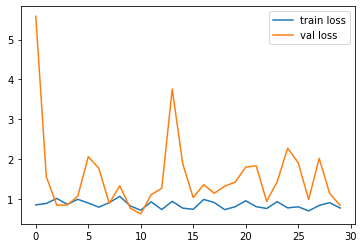

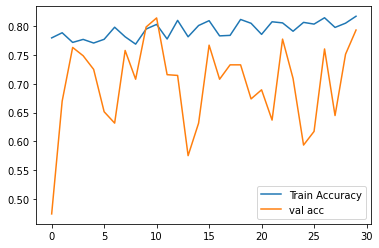

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.preprocessing.image import load_img
from keras_preprocessing.image import img_to_array

In [18]:
img = "/content/drive/MyDrive/DataSet/brain_cancer/Testing/glioma/Te-glTr_0000.jpg"

In [19]:
test_image = load_img(img, target_size = (224, 224))

In [20]:
test_image = img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image).round(3)

In [ ]:
result

array([[0.781, 0.051, 0.003, 0.165]], dtype=float32)

In [ ]:
pred = np.argmax(result)

In [ ]:
typeOfDisease = ['Giloma', 'Meningioma', 'No Tumor', 'Pituitary']

In [ ]:
typeOfDisease[pred]

'Giloma'

In [ ]:
model.save("/content/drive/MyDrive/CNN_Models/resent_for_brain_cancer_detection.h5")

#Predict and Evaluate

In [15]:
#load the model
from tensorflow.keras import models
model = models.load_model("/content/drive/MyDrive/CNN_Models/resent_for_brain_cancer_detection.h5")

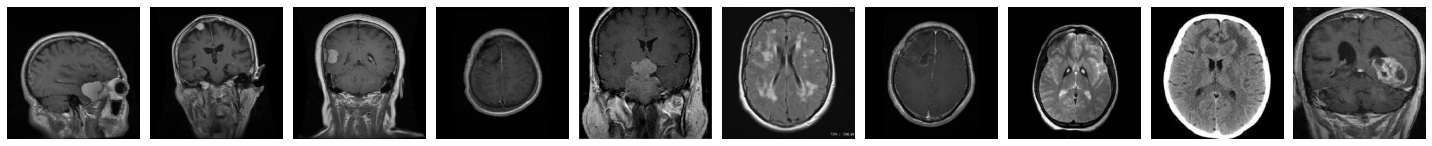

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [31]:
test_imgs, test_labels = next(test_set)
PlotImg(test_imgs)
print(test_labels)

In [32]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [33]:
#predictions
pred = model.predict(x=test_set, verbose=0)

In [34]:
np.round(pred)

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

##verify by confusion matrix

In [37]:
#import confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

In [36]:
cm = confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(pred, axis=-1))

In [43]:
def plt_confusion_matrix_result(cm, classes, normalize=False, title="confusion matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")

  else:
    print("Confusion matrix")

  print(cm)
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")


In [39]:
test_set.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [41]:
cm_plot_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

Confusion matrix
[[ 77 143  64  16]
 [ 79 151  60  16]
 [ 41  75  26  12]
 [  8   8   4   0]]


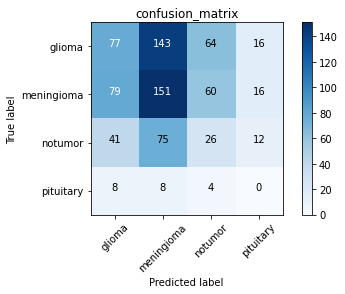

In [44]:
plt_confusion_matrix_result(cm=cm, classes=cm_plot_labels, title="confusion_matrix")